## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

Solution: [homework.ipynb](homework.ipynb)

In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

You can do it with `wget`:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#%%bash
#wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
#unzip bank+marketing.zip 
#unzip bank.zip

In [3]:
df = pd.read_csv('/Users/nathaly/MLZoomcamp/04-evaluation/bank+marketing/bank/bank-full.csv',sep =';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


We need `bank-full.csv`.

In this dataset the target variable is `y` variable - has the client subscribed a term deposit or not. 

### Dataset preparation

For the rest of the homework, you'll need to use only these columns:

* `'age'`,
* `'job'`,
* `'marital'`,
* `'education'`,
* `'balance'`,
* `'housing'`,
* `'contact'`,
* `'day'`,
* `'month'`,
* `'duration'`,
* `'campaign'`,
* `'pdays'`,
* `'previous'`,
* `'poutcome'`,
* `'y'`


In [5]:
columns = [
'age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y'
]

In [6]:
df = df[columns]

In [7]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop(columns='y')

In [10]:
y = df.y.replace(['yes', 'no'],[1,0])

/var/folders/xj/j8r00dd95wn7lh34b83jtgg80000gp/T/ipykernel_23922/4090191733.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df.y.replace(['yes', 'no'],[1,0])


In [11]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 1)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state = 1)

In [13]:
len(X), len(X_train), len(X_val), len(X_test)

(45211, 27126, 9042, 9043)

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `balance`
- `day`
- `duration`
- `previous`


In [14]:
numerical = list(X_train.select_dtypes(['int64']).columns)

In [15]:
categorical = list(X_train.select_dtypes(['object']).columns)

In [16]:
from sklearn.metrics import roc_auc_score

In [17]:
df_auc = pd.DataFrame(columns = ['columns', 'auc'])

for i,n in enumerate(numerical):
    auc = roc_auc_score(y_train, X_train[n])
    if auc<0.5:
        auc = roc_auc_score(y_train, -X_train[n])
    df_auc.loc[i] = [n,auc]    
    i=i+1

In [18]:
df_auc.sort_values(by='auc')

,columns,auc
0,age,0.512186
2,day,0.525958
4,campaign,0.571454
1,balance,0.588831
5,pdays,0.590128
6,previous,0.598565
3,duration,0.814700


The highest is balance.


### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [20]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [21]:
dv = DictVectorizer(sparse = False)

In [22]:
train_dict = X_train.to_dict(orient='records')
X_train_t=dv.fit_transform(train_dict)
model.fit(X_train_t, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [23]:
val_dict = X_val.to_dict(orient='records')
X_val_t = dv.transform(val_dict)

In [24]:
y_predict=model.predict_proba(X_val_t)[:,1]

In [25]:
y_predict

array([0.02879608, 0.02272164, 0.02000003, ..., 0.25000065, 0.00209306,
       0.03788533], shape=(9042,))

In [26]:
np.set_printoptions(legacy='1.25')

In [27]:
roc_auc_score(y_val, y_predict)

0.8999653998756322

In [28]:
round(roc_auc_score(y_val, y_predict),3)

0.9

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.69
- 0.79
- 0.89
- 0.99

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.265
* 0.465
* 0.665
* 0.865

In [29]:
thresholds = np.arange(0, 1, 0.01)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
#serie =pd.Series(y_predict)

In [32]:
#y_predict_int = serie.apply(lambda x: 1 if x>=0.5 else 0)

In [33]:
scores=pd.DataFrame(columns =['t', 'p', 'r'])
for i,t in enumerate(thresholds):
    score = accuracy_score(y_val,y_predict>=t)
    matrix = confusion_matrix(y_val, y_predict>=t)
    tn = matrix[0,0]
    fn = matrix[1,0]
    tp = matrix[1, 1]
    fp = matrix[0,1]
    p = tp/(fp+tp)
    r = tp/(fn+tp)
    scores.loc[i] = [t, p, r]

In [34]:
scores[(scores.t>0.2) & (scores.t<0.3)]

,t,p,r
21,0.21,0.517699,0.639344
22,0.22,0.527079,0.629326
23,0.23,0.531797,0.609290
24,0.24,0.539289,0.593807
25,0.25,0.547496,0.577413
26,0.26,0.559534,0.569217
27,0.27,0.563653,0.556466
28,0.28,0.566288,0.544627
29,0.29,0.567961,0.532787


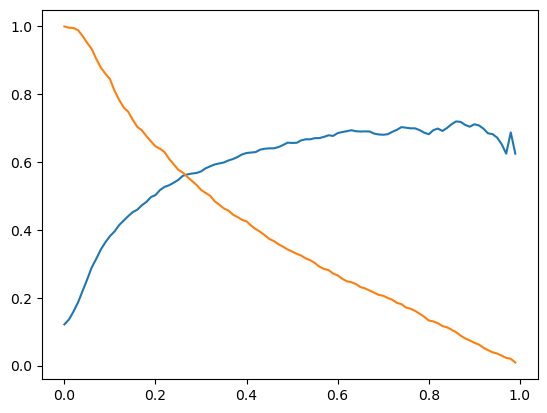

In [35]:
plt.plot(scores.t, scores.p)
plt.plot(scores.t, scores.r)

In [36]:
indices = np.where(np.isclose(scores.p, scores.r, atol=0.01))[0]

In [37]:
indices

array([26, 27])

In [38]:
scores.iloc[indices]

,t,p,r
26,0.26,0.559534,0.569217
27,0.27,0.563653,0.556466


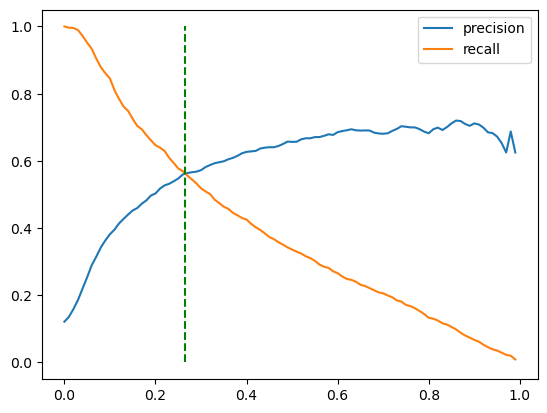

In [39]:
plt.plot(scores.t, scores.p, label='precision')
plt.plot(scores.t, scores.r, label='recall')

plt.vlines(0.265, 0, 1, color = 'green', linestyle = '--')

plt.legend()

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.02
- 0.22
- 0.42
- 0.62

In [40]:
scores_F=pd.DataFrame(columns =['t', 'p', 'r', 'F'])
for i,t in enumerate(thresholds):
    score = accuracy_score(y_val,y_predict>=t)
    matrix = confusion_matrix(y_val, y_predict>=t)
    tn = matrix[0,0]
    fn = matrix[1,0]
    tp = matrix[1, 1]
    fp = matrix[0,1]
    p = tp/(fp+tp)
    r = tp/(fn+tp)
    F = 2*(p*r)/(p+r)
    scores_F.loc[i] = [t, p, r, F]

In [41]:
scores_F[scores_F.t.isin([0.02,0.22,0.42,0.62])].sort_values(by='F', ascending=False)

,t,p,r,F
22,0.22,0.527079,0.629326,0.573682
42,0.42,0.629630,0.402550,0.491111
62,0.62,0.691139,0.248634,0.365707
2,0.02,0.159306,0.995446,0.274658


F1 is highest at thresholds 0.22

### Question 5: 5-Fold CV

Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.26

In [42]:
from sklearn.model_selection import KFold

In [43]:
kfold = KFold(n_splits=5, shuffle = True, random_state = 1)

In [44]:
scores = []
for train_idx, val_idx in kfold.split(X_full_train):
    X_train_full = dv.transform(X_full_train.to_dict(orient = 'records'))
    X_train_k = X_train_full[train_idx]
    X_val_k = X_train_full[val_idx]

    y_train = y_full_train.iloc[train_idx]
    y_val = y_full_train.iloc[val_idx]

    model = LogisticRegression(solver = 'liblinear', C=1, max_iter = 1000)
    model.fit(X_train_k, y_train)
    y_pred = model.predict_proba(X_val_k)[:,1]

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

In [45]:
scores

[0.8991066306040488,
 0.8988958506935749,
 0.911149576951329,
 0.9079748009686723,
 0.9120918352270209]

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
clf = LogisticRegression(solver = 'liblinear', C=1, max_iter = 1000)

In [48]:
X_train_full = dv.transform(X_full_train.to_dict(orient = 'records'))

In [49]:
scores_cross_val = cross_val_score(clf, X_train_full, y_full_train, cv=kfold, scoring='roc_auc')

In [50]:
scores_cross_val

array([0.89910663, 0.89889585, 0.91114958, 0.9079748 , 0.91209184])

In [51]:
np.std(scores_cross_val)

0.005751414250417919

The standard deviation is 0.006.

### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.


In [52]:
C=[0.000001, 0.001, 1]

In [53]:
kfold = KFold(n_splits=5, shuffle = True, random_state = 1)

In [54]:
df_c_roc = pd.DataFrame(columns =['C', 'mean', 'std'])
for i,c in enumerate(C):
    clf = LogisticRegression(solver = 'liblinear', C=c, max_iter = 1000)
    X_train_full = dv.transform(X_full_train.to_dict(orient = 'records'))
    scores_auc = cross_val_score(clf, X_train_full, y_full_train, cv=kfold, scoring='roc_auc')
    mean = np.mean(scores_auc)
    std = np.std(scores_auc)
    df_c_roc.loc[i] = [c, mean, std]


In [55]:
round(df_c_roc.sort_values(by='std', ascending = False),3)

,C,mean,std
0,0.000,0.701,0.009
1,0.001,0.861,0.007
2,1.000,0.906,0.006


The score with the lowest standard deviation is C = 1


## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw04
* If your answer doesn't match options exactly, select the closest one